In [1]:
#Importing the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Import the datasets
train = pd.read_csv('../input/bnp-paribas-cardif-claims-management/train.csv.zip')
test = pd.read_csv('../input/bnp-paribas-cardif-claims-management/test.csv.zip')

In [3]:
#Features and Observations
print('Training Set : %d observations & %d features'%(train.shape[0],train.shape[1]))
print('Test Set : %d observations & %d features'%(test.shape[0],test.shape[1]))

Training Set : 114321 observations & 133 features
Test Set : 114393 observations & 132 features


In [4]:
#Fill Missing Categorical Values with most frequent occuring
train = train.fillna(train.mode().iloc[0])
test = test.fillna(test.mode().iloc[0])

In [5]:
#Fill Missing numeric value with mean of respective column
train = train.fillna(value=train.mean())
test = test.fillna(value=train.mean())

In [6]:
cat_var = [key for key in dict(train.dtypes)
             if dict(train.dtypes)[key] in ['object'] ]

In [7]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train['v3'] = le.fit_transform(train['v3'])
train['v22'] = le.fit_transform(train['v22'])
train['v24'] = le.fit_transform(train['v24'])
train['v30'] = le.fit_transform(train['v30'])
train['v31'] = le.fit_transform(train['v31'])
train['v47'] = le.fit_transform(train['v47'])
train['v52'] = le.fit_transform(train['v52'])
train['v56'] = le.fit_transform(train['v56'])
train['v66'] = le.fit_transform(train['v66'])
train['v71'] = le.fit_transform(train['v71'])
train['v74'] = le.fit_transform(train['v74'])
train['v75'] = le.fit_transform(train['v75'])
train['v79'] = le.fit_transform(train['v79'])
train['v91'] = le.fit_transform(train['v91'])
train['v107'] = le.fit_transform(train['v107'])
train['v110'] = le.fit_transform(train['v110'])
train['v112'] = le.fit_transform(train['v112'])
train['v113'] = le.fit_transform(train['v113'])
train['v125'] = le.fit_transform(train['v125'])

test['v3'] = le.fit_transform(test['v3'])
test['v22'] = le.fit_transform(test['v22'])
test['v24'] = le.fit_transform(test['v24'])
test['v30'] = le.fit_transform(test['v30'])
test['v31'] = le.fit_transform(test['v31'])
test['v47'] = le.fit_transform(test['v47'])
test['v52'] = le.fit_transform(test['v52'])
test['v56'] = le.fit_transform(test['v56'])
test['v66'] = le.fit_transform(test['v66'])
test['v71'] = le.fit_transform(test['v71'])
test['v74'] = le.fit_transform(test['v74'])
test['v75'] = le.fit_transform(test['v75'])
test['v79'] = le.fit_transform(test['v79'])
test['v91'] = le.fit_transform(test['v91'])
test['v107'] = le.fit_transform(test['v107'])
test['v110'] = le.fit_transform(test['v110'])
test['v112'] = le.fit_transform(test['v112'])
test['v113'] = le.fit_transform(test['v113'])
test['v125'] = le.fit_transform(test['v125'])

In [8]:
#Normalize skewed features
from scipy.stats import skew
from scipy.stats.stats import pearsonr

numeric_feats = train.dtypes[train.dtypes != 'object'].index
skewed_feats = train[numeric_feats].apply(lambda x: skew(x.dropna()))

skewed_feats = skewed_feats[skewed_feats > 0.75]
skewed_feats = skewed_feats.index

train[skewed_feats] = np.log1p(train[skewed_feats])
test[skewed_feats] = np.log1p(test[skewed_feats])

In [9]:
#Correlation Matrix
colormap = plt.cm.viridis
cor = train.corr()
cor = cor.drop(['ID'],axis=1).drop(['ID'],axis=0)
#plt.figure(figsize=(12,12))
#sns.heatmap(cor,vmax=0.8,cmap=colormap,annot=True,fmt='.2f',square=True,annot_kws={'size':10},linecolor='white',linewidths=0.1)

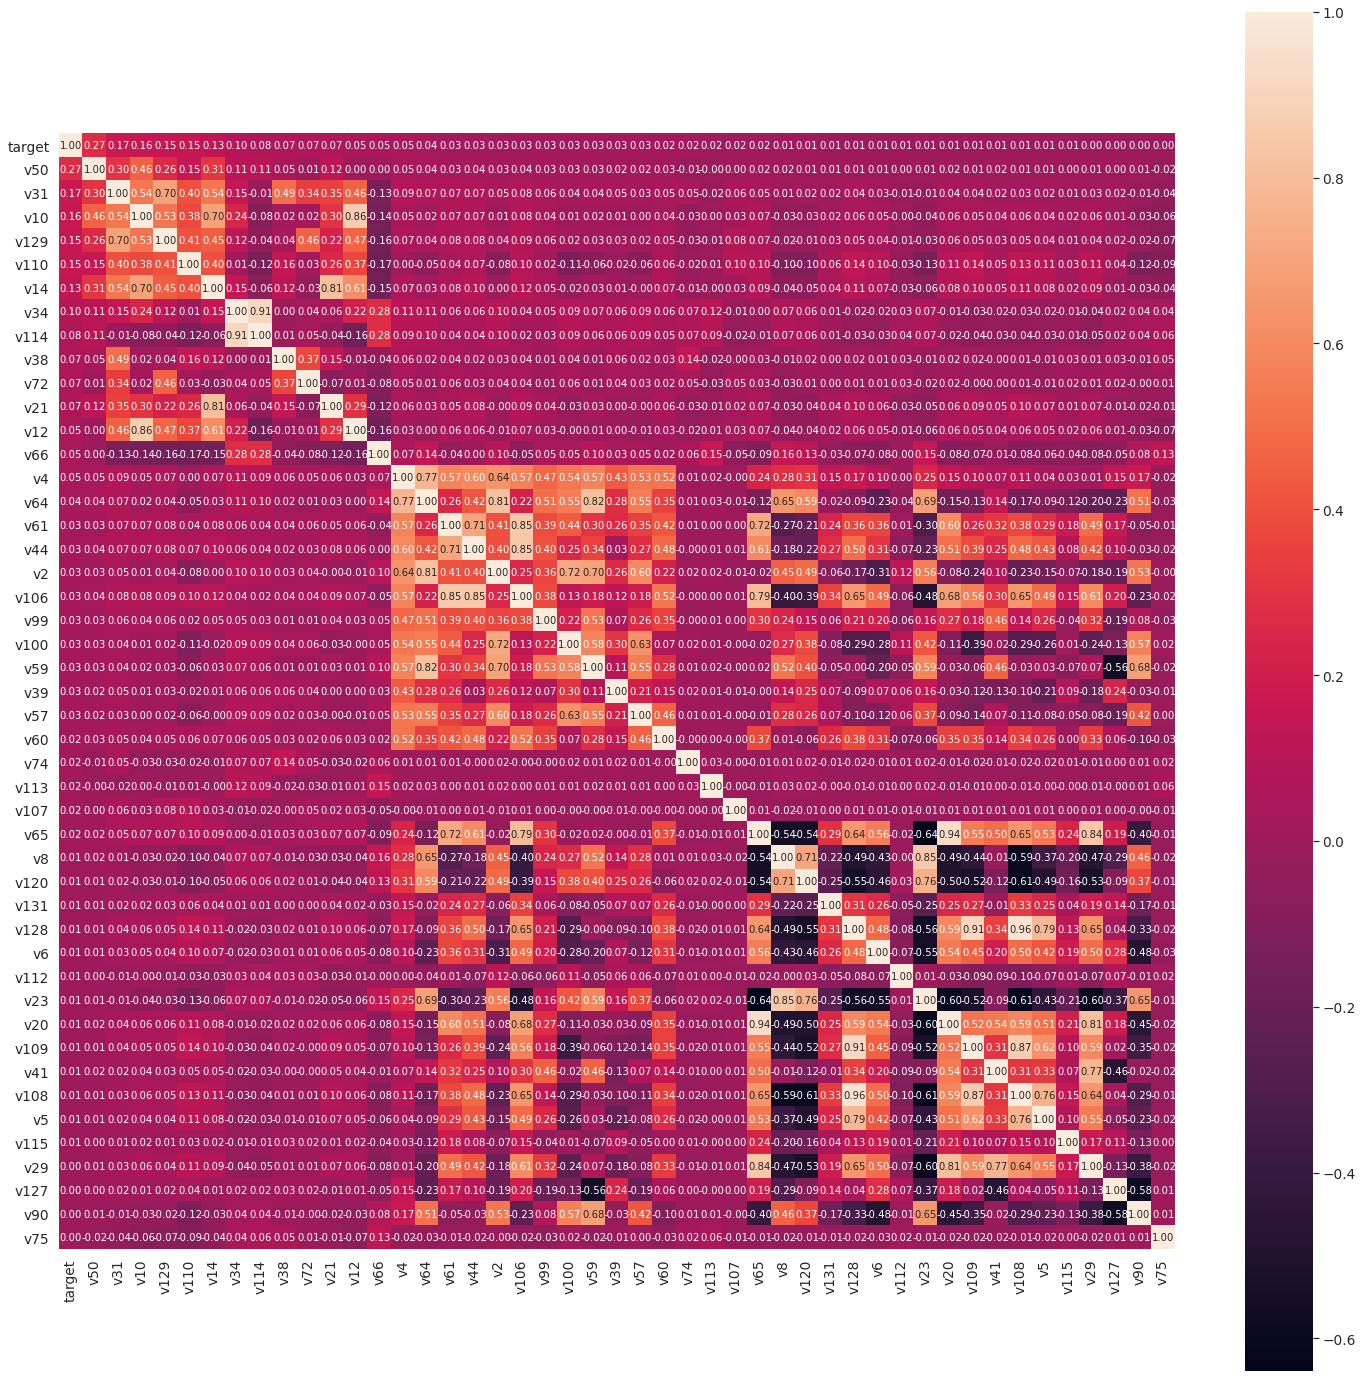

Features with Maximum Correlation with target:
 Index(['target', 'v50', 'v31', 'v10', 'v129', 'v110', 'v14', 'v34', 'v114',
       'v38', 'v72', 'v21', 'v12', 'v66', 'v4', 'v64', 'v61', 'v44', 'v2',
       'v106', 'v99', 'v100', 'v59', 'v39', 'v57', 'v60', 'v74', 'v113',
       'v107', 'v65', 'v8', 'v120', 'v131', 'v128', 'v6', 'v112', 'v23', 'v20',
       'v109', 'v41', 'v108', 'v5', 'v115', 'v29', 'v127', 'v90', 'v75'],
      dtype='object')


In [10]:
#47 features have coeff >= 0.00
k = 47 #number of variables for heatmap
cols = cor.nlargest(k, 'target')['target'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.25)
plt.figure(figsize=(25,25))
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values, linecolor='white')
plt.show()

print('Features with Maximum Correlation with target:\n',cols)

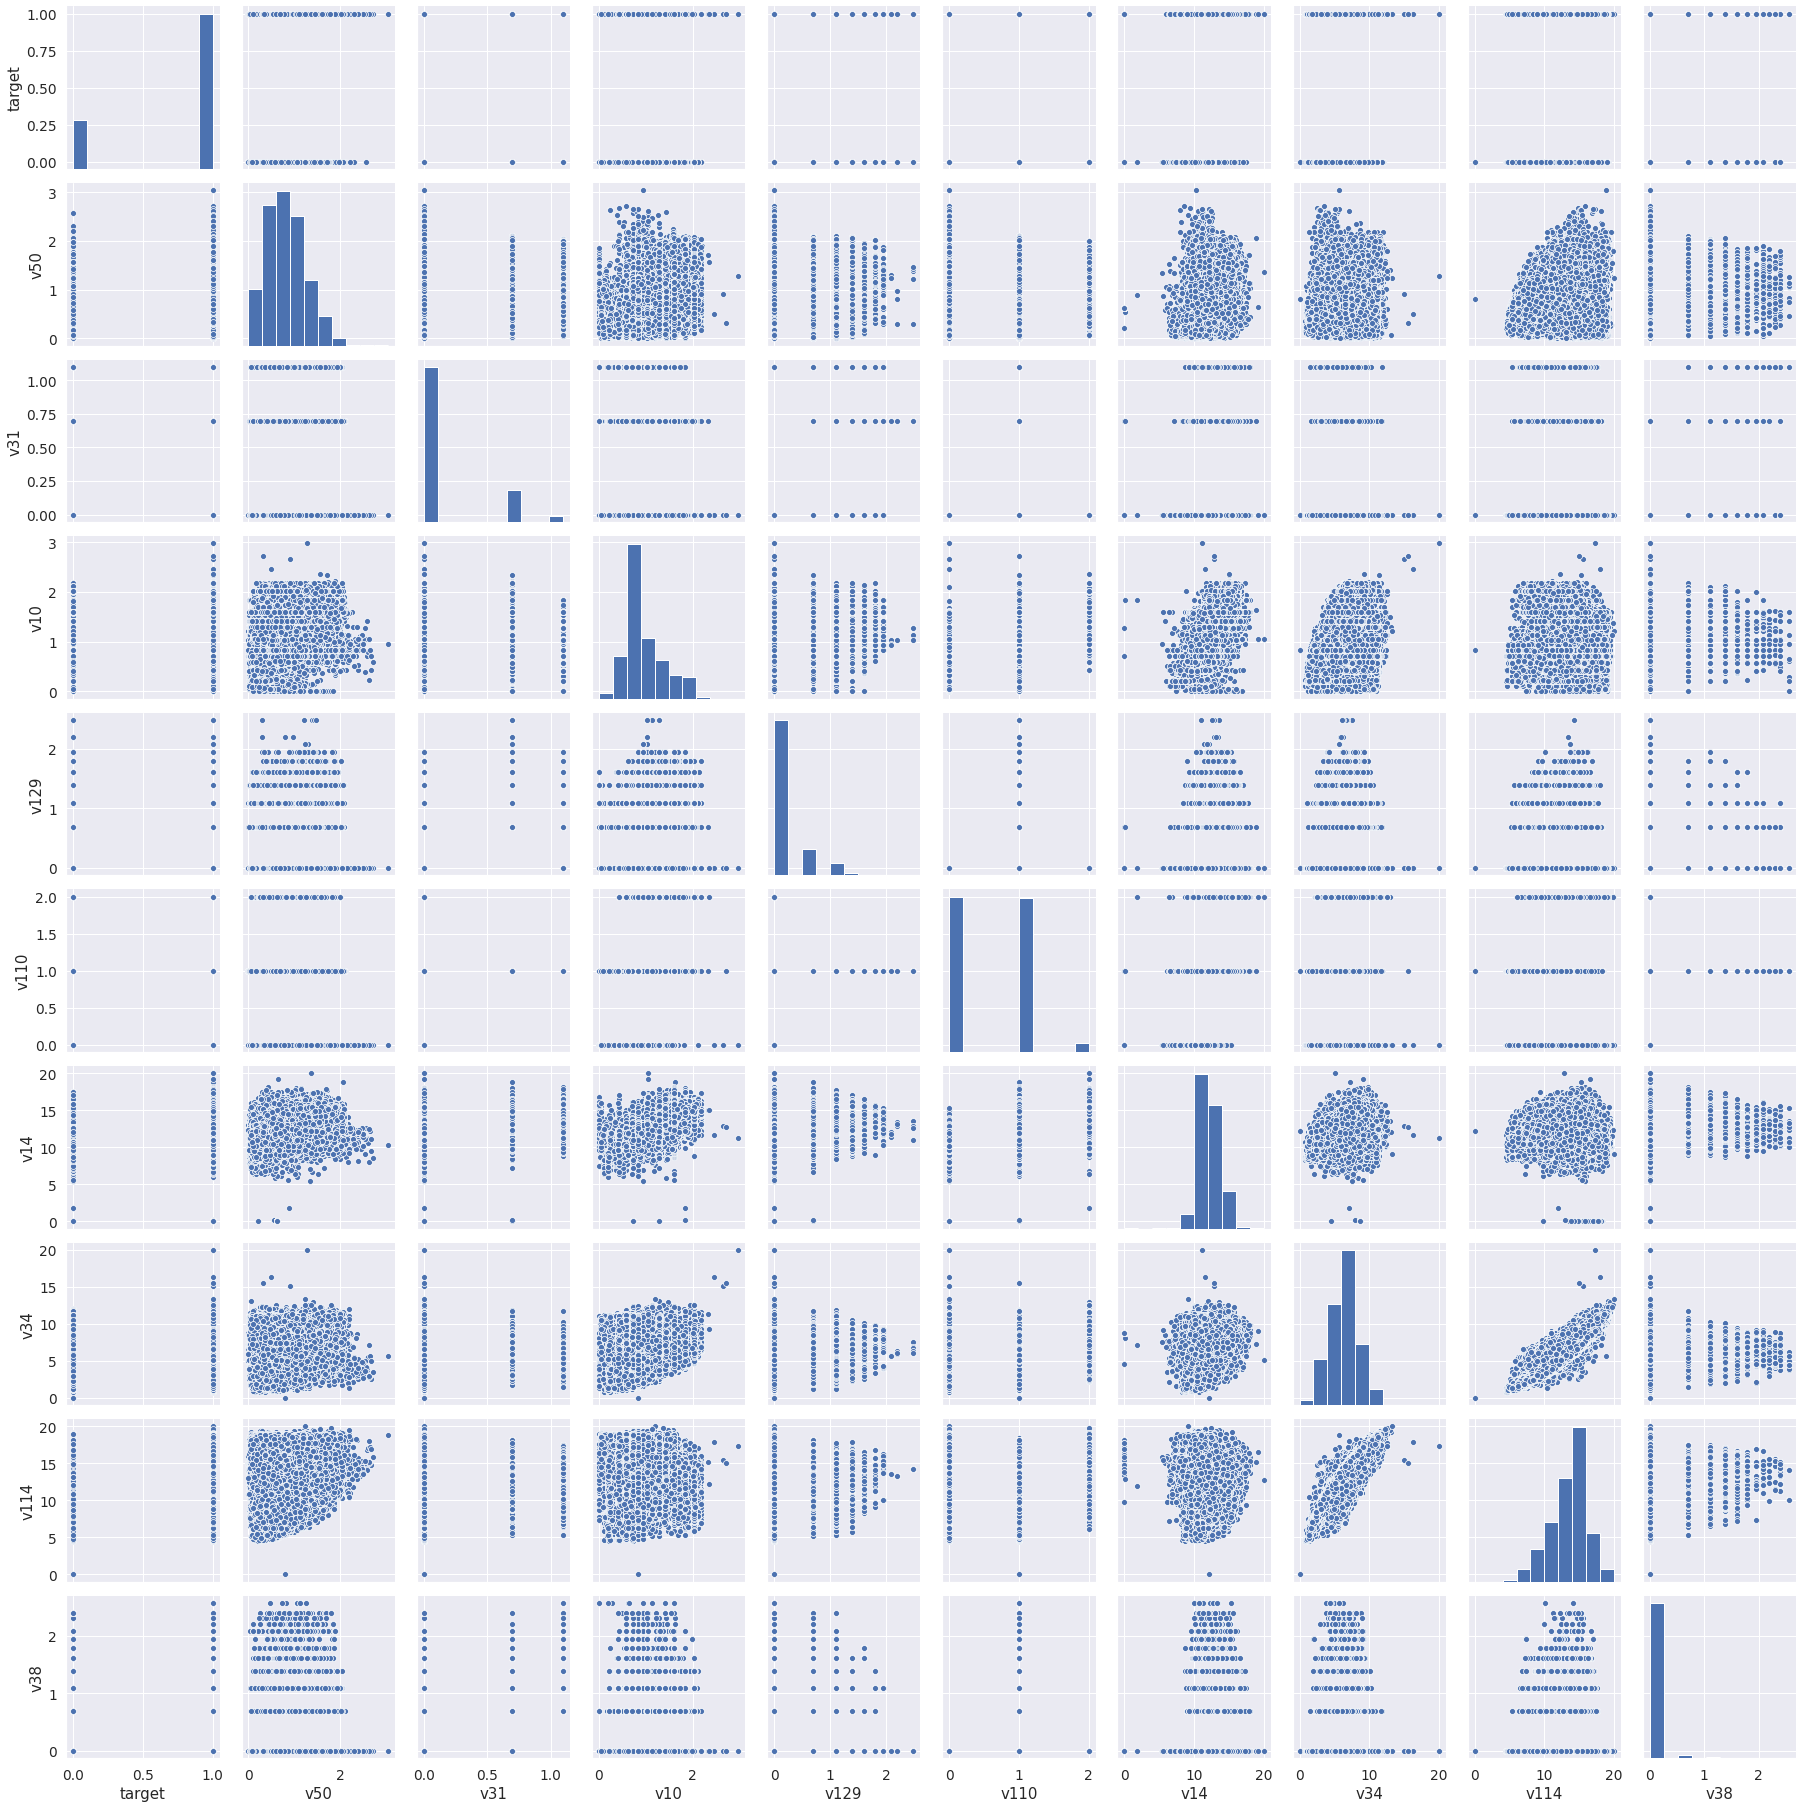

In [11]:
# Next, pair plot some important features
imp_feats = cols[:10]
sns.pairplot(train[imp_feats],height=2.5)
plt.show()

In [12]:
#Removing outliers as seen from the pairplot
ctr_removed = 0 
for i in range(len(train)):
    if train['v50'][i] > 3 or train['v50'][i] < 0:
        train = train.drop(index = i, axis = 0)
        ctr_removed += 1
        i += 1
    if train['v10'][i] > 2.20 or train['v10'][i] < 0:
        train = train.drop(index = i, axis = 0)
        ctr_removed += 1
        i += 1
    if train['v14'][i] > 18.5 or train['v14'][i] < 5:
        train = train.drop(index = i, axis = 0)
        ctr_removed += 1
        i += 1
    if train['v34'][i] > 15 or train['v34'][i] < 0.5:
        train = train.drop(index = i, axis = 0)
        ctr_removed += 1
        i += 1
    if train['v114'][i] < 3:
        train = train.drop(index = i, axis = 0)
        ctr_removed += 1
        i += 1
    if train['v14'][i] < 4:
        train = train.drop(index = i, axis = 0)
        ctr_removed += 1
        i += 1
    if train['v21'][i] > 18 or train['v21'][i] < 0.5:
        train = train.drop(index = i, axis = 0)
        ctr_removed += 1  
        i += 1
print('Total samples removed : ',ctr_removed)    

Total samples removed :  156


In [13]:
X = train
X = X.drop(labels = ['target','ID'],axis = 1)
y = train['target']
X_submit = test.drop(labels = ['ID'],axis = 1)

In [18]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)
X_submit = sc.transform(X_submit)

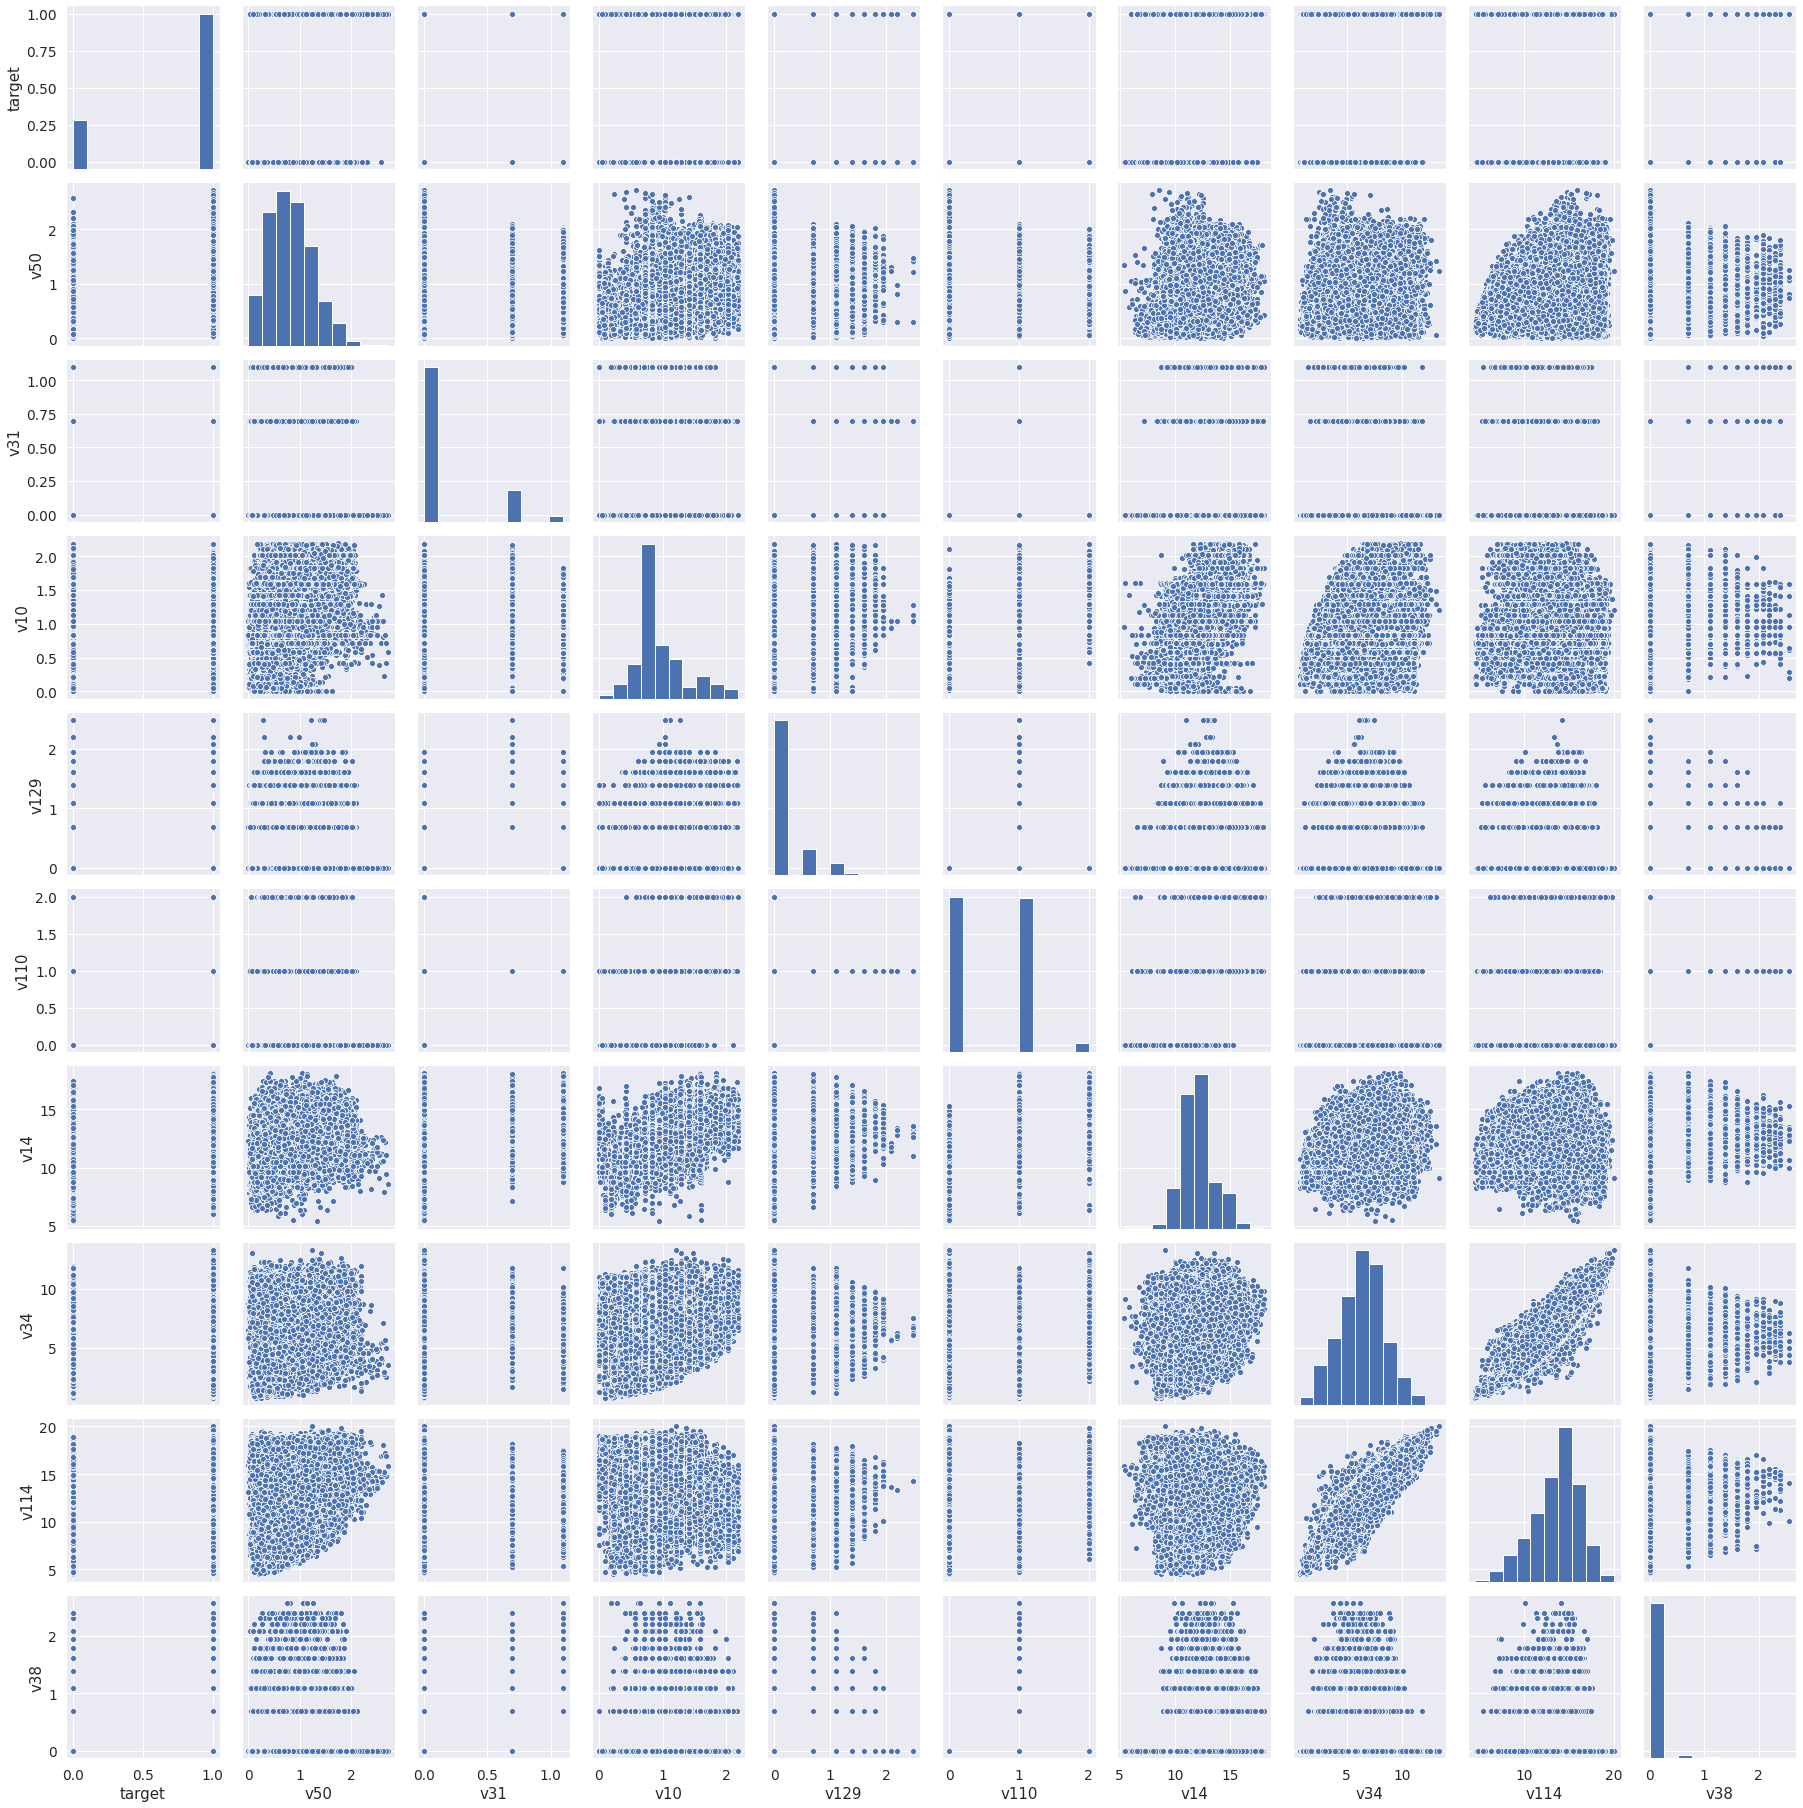

In [19]:
#Important features after removal after outliers
imp_feats = cols[:10]
sns.pairplot(train[imp_feats],height=2.5)
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


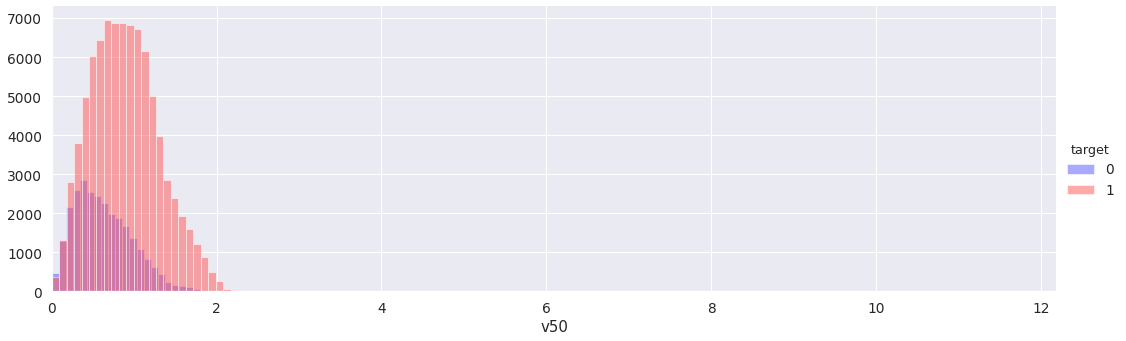

In [20]:
# Take a further look at v50
#train['v50'] = np.log1p(train['v50'] )
facet = sns.FacetGrid(train, hue='target',size=5,aspect=3,palette='seismic')
facet.map(plt.hist,'v50',bins=30,alpha=0.5)
facet.set(xlim=(0,train.v10.max()+10))
facet.add_legend()

In [21]:
ctr_0, ctr_1 = 0, 0
for i in range(len(y)):
    if np.array(y)[i] == 0:
        ctr_0 += 1
    else:
        ctr_1 += 1

print('Count of target = 1 : ', ctr_1)
print('Count of target = 0 : ', ctr_0)

Count of target = 1 :  86893
Count of target = 0 :  27272


In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.85, shuffle = True)

In [23]:
from scipy import stats
from scipy.stats import skew
from scipy.stats import mode
from scipy.optimize import minimize
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier,GradientBoostingClassifier, VotingClassifier
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb

**Modelling**

In [ ]:
from sklearn.model_selection import GridSearchCV
xgb1 = xgb.XGBClassifier()
parameters = {'learning_rate': [0.01],
              'booster' : ['gbtree'],
              'n_estimators': [8000,9000,10000],
              'min_child_weight': [0],
              #'max_depth': [0,8,16,24],
              'max_delta_step': [0],
              'gamma': [0],
              'scale_pos_weight' : [ctr_0/ctr_1],
              'random_state' : [0],
              'tree_method' : ['gpu_hist'],
              'n_jobs' : [4]}

xgb_grid = GridSearchCV(xgb1,
                        parameters,
                        cv = 2,
                        verbose=True,
                        n_jobs=4)

xgb_grid.fit(X,y)

print(xgb_grid.best_score_)
print(xgb_grid.best_params_)

In [24]:
#Fit the model
clf = xgb.XGBClassifier(learning_rate = 0.01,scale_pos_weight = ctr_0/ctr_1,
                        n_estimators = 10000, tree_method = "gpu_hist" ,booster = "gbtree", n_jobs = -1)
clf.fit(X,y)
y_pred_xgb = clf.predict_proba(X_submit)[:,1]
#print(clf.feature_importances_)

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier as etc
from sklearn.model_selection import GridSearchCV
etc_clf = ExtraTreesClassifier(random_state = 0)
parameters = {'n_estimators' : [1200],
              'criterion' : ['entropy'],
              'max_depth' : [30],
              'min_samples_split' : [2],
              'min_samples_leaf' : [2],
              'random_state' : [0]}

etc_grid = GridSearchCV(etc_clf,parameters,cv = 3,verbose=True,n_jobs=-1)

etc_grid.fit(X,np.array(y))

print(etc_grid.best_score_)
print(etc_grid.best_params_)

In [25]:
etc = ExtraTreesClassifier(n_estimators = 1000, criterion = 'entropy',max_features = 50, max_depth = 35, min_samples_split = 4,min_samples_leaf = 2,n_jobs = -1)
etc.fit(X,y)
y_pred_etc = etc.predict_proba(X_submit)[:,1]

In [26]:
y_pred_9 = y_pred_xgb*0.5 + y_pred_etc*0.5
y_pred_10 = y_pred_xgb*0.7 + y_pred_etc*0.3
y_pred_11 = y_pred_xgb*0.3 + y_pred_etc*0.7

In [27]:
test['PredictedProb'] = y_pred_9
X_submission = test[['ID','PredictedProb']]

In [28]:
X_submission.to_csv('Submission_ET_XGB_0.5_0.5.csv',index=False)

In [30]:
test['PredictedProb'] = y_pred_10
X_submission = test[['ID','PredictedProb']]

In [31]:
X_submission.to_csv('Submission_ET_XGB_0.3_0.7.csv',index=False)

In [34]:
test['PredictedProb'] = y_pred_etc
X_submission = test[['ID','PredictedProb']]

In [37]:
X_submission.to_csv('Submission_ET-2.csv',index=False)